# Lattice-3 Hexagonal

When we say "Lattice-3, each edge gets divided into 3. Another way of saying this is that the density is 2.
Lattice-2 would be denisty of 1.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from hexagon_utilities import *
from colors import *
import plot_functions as pf
from hex_trees import *

## The Idea behind Lattice-3

This one was a fairly simple idea. To trisect each of the 6 edges of each hexagon in a HexGrid.
Once that was done (12 new points + the 6 vertices), connect everything using only lines parallel to the Edges.
(I have created a nice convenience method called `h.render_parallel_line()` that makes this very easy.

The only tricky part, calculate the XY coordinates of each of the intersection points. I must have a function to compute the intersection of 2 lines, but can't recall in which notebook I last used it.


## Algorithm Steps

1. Generate/compute all the lattice points
2. Store them in a suitable data structure, such that symmetrical retrieval is possible
3. Create lines, shapes (polygons) and reflect them.
4. Symmetry can be mirror, ROT180, or 6WAY


## Try it on one Hexagon

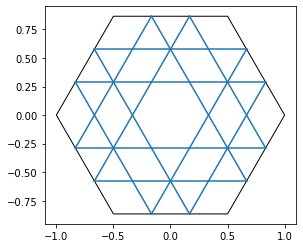

In [3]:
h = Hex()
h.render(fc='none', color='k')

for ed in range(6):
    h.render_parallel_line('e'+str(ed), 1/3)
    h.render_parallel_line('e'+str(ed), 2/3)
plt.axis('scaled');

### Let's add the 'spokes' to complete the hexagonal lattice

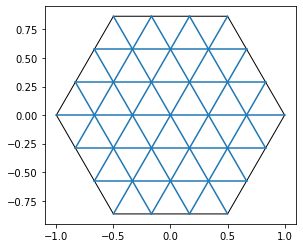

In [4]:
h = Hex()
h.render(fc='none', color='k')
h.render_spokes()
for ed in range(6):
    h.render_parallel_line('e'+str(ed), 1/3)
    h.render_parallel_line('e'+str(ed), 2/3)
plt.axis('scaled');

Notice that INSIDE each hexagon, there are 5 lines in each of the XYZ axis, for a total of 15.
- The INTERIOR points are in (3,4,5,4,3) order.
- The EXTERIOR points are 3 per edge, for a total of 18 including the vertices.

Now, in order to really use these points, we first need to compute each of their coordinates.

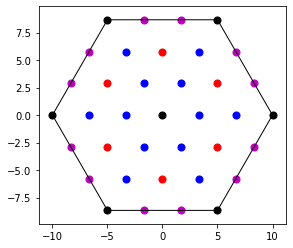

In [5]:
h = Hex(size=10)
h.render(fc='none', color='k')

h.plot_points([h.center]) # 1 point
h.plot_points(h.get_verts()) # 6 points
etp = h.point(pt_name='edge', action='trisect') # 12 points
h.plot_points(etp, color='m')
stp = h.point(pt_name='spoke', action='trisect') # 12 points
h.plot_points(stp, color='b')

# 2/3rd of the inradius distance (h/2) 
# since dist has to be in h.size, we convert absolute size to relative by dividing by h.size
atp = h.point(pt_name='apo', dist= 2 / 3 * h.ht/2 / h.size) # 6 points
h.plot_points(atp, color='r')
    
plt.axis('scaled');

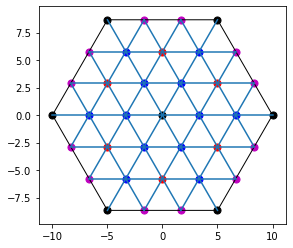

In [6]:
h = Hex(size=10)
h.render(fc='none', color='k')

h.render_spokes()
for ed in range(6):
    h.render_parallel_line('e'+str(ed), 1/3)
    h.render_parallel_line('e'+str(ed), 2/3)


h.plot_points([h.center]) # 1 point

h.plot_points(h.get_verts()) # 6 points
etp = h.point(pt_name='edge', action='trisect') # 12 points
h.plot_points(etp, color='m')
stp = h.point(pt_name='spoke', action='trisect') # 12 points
h.plot_points(stp, color='b')

# 2/3rd of the inradius distance (h/2) 
# since dist has to be in h.size, we convert absolute size to relative by dividing by h.size
atp = h.point(pt_name='apo', dist= 2 / 3 * h.ht/2 / h.size) # 6 points
h.plot_points(atp, color='r')
    
plt.axis('scaled');

# Store all the 18+18+1 points

Start with a lattice dictionary. Though other data_structs might be more suitable.

In [7]:
def get_lattice_points(h):

    etp = h.point(pt_name='edge', action='trisect') # 12 points
    stp = h.point(pt_name='spoke', action='trisect') # 12 points
    atp = h.point(pt_name='apo', dist= 2 / 3 * h.h/2 / h.size) # 6 points

    lat = {}
    lat['c'] = h.center
    lat['v'] = h.get_verts() #6
    lat['etp1'] = etp[:6] 
    lat['etp2'] = etp[6:]
    lat['stp1'] = stp[:6] 
    lat['stp2'] = stp[6:]
    lat['atp2'] = atp

    return lat
    
    

## 6-way symmetry

### Points

### Lines

### Shapes

(-1.2, 3.2, -0.9526279441628827, 0.9526279441628827)

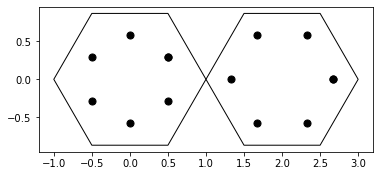

In [8]:
size = 1
h0 = Hex(0,0,size)
h1 = Hex(2,0,size)
lat0 = h0.get_lattice_points()
lat1 = h1.get_lattice_points()

h0.render(fc='none', color='k')
h0.plot_points(lat0['ab'])
h1.render(fc='none', color='k')
h1.plot_points(lat1['sb'])
plt.axis('scaled')

In [9]:
a = (2,3)
type(a)

tuple

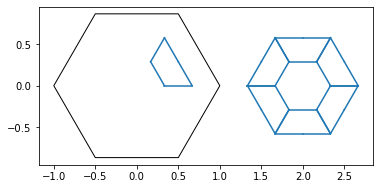

In [10]:
size = 1
h0 = Hex(0,0,size)
h1 = Hex(2,0,size)
lat0 = h0.get_lattice_points()
lat1 = h1.get_lattice_points()

h0.render(fc='none', color='k')
lat0 = h0.get_lattice_points()

h0.render_line([lat0['sb'][0], lat0['sa'][0], lat0['sa'][1],lat0['sb'][1],
                lat0['ab'][0]], 
               close=True)
#Now, let's draw the 6-way symmetrical shapes on h1
for seg in range(6):
    h1.render_line([lat1['sb'][seg], lat1['sa'][seg], lat1['sa'][seg+1],lat1['sb'][seg+1],
                    lat1['ab'][seg]
                   ], close=True)


plt.axis('scaled');


In [11]:
def _draw_symmetrical_shapes(self, ptups, axis, shape=['line'], color_scheme = {},
                           close=False, connect_original_points=True, 
                           draw_axis=False, **kwargs):
    """
    Draw pairs of lines connecting the given points across the specified axis. 
    
    By default, it will draw the line connecting the original set of points as well. 
    
    Parameters
    ------------
    
    color_scheme: Dict
        Specifies which colors to use for the original and reflected lines. Keys can only 'x', 'y', 'z' or '6'
        The value of the dictionary should be a List of color names. It should be 1, 2, or 6 colors for 6-fold
        symmetry. If only one color is specified, then all lines will be drawn with that color.
        
        
    
    """
    if close:
        ptups.append(ptups[0])
    
    pts = [lat0[n][i] for n,i in pt_tups]
    pt_indices = [i for n,i in pt_tups]
    axis = axis.lower()
    
    sympts =[]
    for ptup in pt_tups:
        print(ptup)
        sympt = self.get_symmetrical_point(ptup, axis)
        sympts.append(sympt)
        
    
    if axis=='6':
        #requires delicated ops. Take the sets 2 at a time, and for every pair, connect them                    
        for petal in range(6): #we will draw 6 symmetrical segments...
            if (axis in color_scheme):
                if len(color_scheme[axis])>=6:                    
                    kwargs['color'] = color_scheme[axis][petal]
                else: #just use the first color alone
                    kwargs['color'] = color_scheme[axis][0]                
                    
            pverts=[] #start building the irregular polygon
            start_idx = petal
            for spt in range(0,len(sympts)-1):
                #offset is the difference between every 2 adjacent indices of the hex segments
                offset = pt_indices[spt+1] - pt_indices[spt]
                #print(f'petal {petal} spt{spt} offset {offset}')
                #print(f'connecting line from index {start_idx} to index {(start_idx+offset)%6}')
                if 'line' in shape or shape=='line':
                    self.render_line(
                        [sympts[spt][start_idx], sympts[spt+1][(start_idx+offset)%6]],
                        close=close, **kwargs)
                if 'poly' in shape or shape=='poly':                
                    pverts.append(sympts[spt][start_idx])       
                    
                #mark the place in the current petal being drawn
                start_idx = (start_idx + offset) %6

            if 'poly' in shape or shape=='poly':                
                poly = Polygon(pverts, **kwargs)
                ax.add_patch(poly)
                
    else: # for x y or z reflections
        
        #Draw the original Line(s)
        if (axis in color_scheme):
            kwargs['color'] = color_scheme[axis][0]                
        self.render_line(pts, close=close, **kwargs)
        if 'poly' in shape or shape=='poly':                
            poly = Polygon(pts, **kwargs)
            ax.add_patch(poly)
        
        #Draw the reflected Line(s)
        if axis in color_scheme and len(color_scheme[axis])>1:#there is a second color
            kwargs['color'] = color_scheme[axis][1]
        self.render_line(sympts, close=close, **kwargs)
        if 'poly' in shape or shape=='poly':                
            poly = Polygon(sympts, **kwargs)
            ax.add_patch(poly)
        
    #self.plot_points(pts)# close=False, color='r', **kwargs)
    if draw_axis:
        self.draw_axis(axis, **kwargs)

    
    

TODO

Move h.render_symmetrical_line(pts, axi) to hex utilties...

render symmetrical polygons

- prefab doublehex, tripleHex()
-prefab hexgrids (small hexes, med, large)

#Store the lattice for all the hexagons
for h in hg.hlist:
    h.get_lattice()



0.8660254037844387

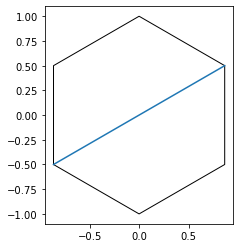

In [13]:
h = Hex(0,0,size, flat=False)
h.render(fill=None)
plt.axis('scaled')

vs = h.get_verts()
h.draw_axis('x')

vs[0][0]

(-0.3333333333333333, 2.041077998578922e-17) <class 'tuple'> 2


(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

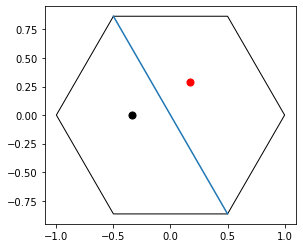

In [14]:

size = 1
h0 = Hex(0,0,size)
h1 = Hex(2,0,size)
h0.render(fc='none', color='k')

lat0 = h0.get_lattice_points()

pindex=1
pt_name = 'sa'

axi = 'y'
symp = h.get_symmetrical_point((pt_name, pindex), axi)
print(symp, type(symp), len(symp))
h0.plot_points(symp)
h0.plot_points(lat0[pt_name][pindex], color='r')
h0.draw_axis(axi)
plt.axis('scaled')

v 4
(-0.4999999999999998, 0.8660254037844387) <class 'tuple'> 2


(-1.1, 1.1, -0.9873067535250669, 0.9870382857393)

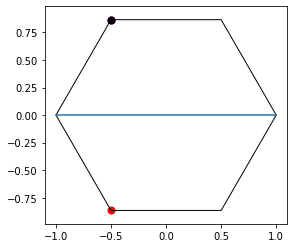

In [15]:
size = 1
h0 = Hex(0,0,size)
h1 = Hex(2,0,size)
h0.render(fc='none', color='k')

lat0 = h0.get_lattice_points()

axi = 'x'
pindex=4
pt_name = np.random.choice(['sa', 'sb', 'ea', 'eb', 'ab'])
pt_name = 'v'
print(pt_name, pindex)
symp = h0.get_symmetrical_point((pt_name, pindex), axi)
print(symp, type(symp), len(symp))
h0.plot_points(lat0[pt_name][2], color='m')
h0.plot_points(symp)
h0.plot_points(lat0[pt_name][pindex], color='r')
h0.draw_axis(axi)
plt.axis('scaled')

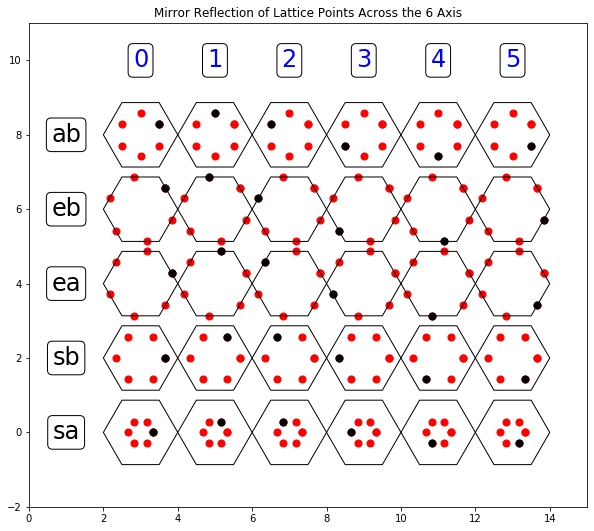

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

axi = '6'
pt_names = ['sa', 'sb', 'ea', 'eb', 'ab']

for y in range(5):
    pt_name = pt_names[y]
    plt.text(1, 2*y, pt_name, {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
    for x in range(6):
        h = Hex(3+2*x, 2*y, size=1)
        h.render(fc='none', color='k') 
        h.get_lattice_points()
        symp = h.get_symmetrical_point((pt_name, x), axi)
        h.plot_points(symp,color='r')
        h.plot_points(h.lattice[pt_name][x], color='k')

        h.draw_axis(axi)

for t in range(6):
    plt.text(3+2*t, 10, str(t), {'color': 'blue', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
        
        
plt.title(f'Mirror Reflection of Lattice Points Across the {axi} Axis')        
plt.axis('scaled')
plt.xlim(0, 15)
plt.ylim(-2, 11);


In [17]:
def hex_cookie_cutter1(h, colors, ax, **kwargs):
    ''' This one just draws lines from fanbase to edge points'''

    if ax is None:
        ax = plt.gca()

    alle = ['e'+str(x) for x in range(6)]
    
    cfam = get_rnd_family() 
    for fan_base in ['e1', 'e3', 'e5']:    
        col_index = 0
        for ende in [e for e in alle if e!= fan_base]:
            for epts in range(2):
                start_a = epts/2
                dist = np.random.uniform(start_a, start_a+0.5)        
                col_index += 1
                color = get_rnd_color_from_family(cfam)
                h.line(start_point=fan_base, end_point=ende, start_pos='mid', end_pos=dist, lw=3,
                       color=color)
        
    return ax,


In [18]:
def hex_cookie_cutter2(h, colors, ax, **kwargs):

    if ax is None:
        ax = plt.gca()

    fan_base = 4
    cfam = get_rnd_family() 
    
    fb = h.point(pt_name='edge', index=fan_base, dist=np.random.uniform(0.3,0.7))[0]

    new_pts = []
    for index in range(6):
        if index!=fan_base:
            p = h.point(pt_name='edge', index=index, dist=np.random.uniform(0,0.4))[0]
            q = h.point(pt_name='edge', index=index, dist=np.random.uniform(0.6,1))[0]
            new_pts.extend([p, q])

    for p in range(0, len(new_pts), 2):
        #print(new_pts[p], new_pts[p+1])
        pt_list= [new_pts[p], new_pts[p+1], fb]
        h.render_polygon(pt_list, include_center=False, ax=ax, fc = get_rnd_color_from_family(cfam))
        
    return ax,


# Grid Variations
1. Each Hex is identical
2. 1 vs 2 points in each Edge
3. Vertices form triangles, or quads
4. Smaller Polygons inside each (echo chamber)
5. Color Variations
6. Color only alternate Polygons
6. Multiple Fan origin


In [86]:
def hex_cookie_cutter(h, color_scheme, directions_d, ax, **kwargs):


    if ax is None:
        ax = plt.gca()

    pt_tups = directions_d['pt_tuples'] 
    axi = directions_d['axis']
    shape = directions_d['shape']

    h.draw_symmetrical_shapes(pt_tups, axi, shape=shape,
                              color_scheme=color_scheme,
                              draw_axis=False, lw=3, close=close)

    #h.render(fill=None)
        
                    
    return ax,

In [116]:
def grid_3(bg_color=None):
    fig, ax = plt.subplots(figsize=(18,12))
    if not bg_color:
        bg_color = 'lightgray'
        fig.patch.set_facecolor(bg_color)
    plt.axis('scaled')
    ax.set_ybound(lower=-10, upper=14)
    ax.set_xbound(lower=-19, upper=30)
    plt.axis('off')
    size=2
    num_rows, num_cols = 15, 9
    hg = HexGrid(num_rows, num_cols, size, flat=True)
    return hg, fig, ax, num_rows, num_cols

def grid_5(bg_color=None):
    fig, ax = plt.subplots(figsize=(18,15))
    if bg_color:
        fig.patch.set_facecolor(bg_color)
    plt.axis('scaled')
    ax.set_ybound(lower=-10, upper=8)
    ax.set_xbound(lower=-10, upper=20)
    plt.axis('off')
    size=2
    num_rows, num_cols = 12, 8
    hg = HexGrid(num_rows, num_cols, size, flat=True)
    return hg, fig, ax, num_rows, num_cols

def grid_8(bg_color=None):
    fig, ax = plt.subplots(figsize=(18,15))
    if bg_color:
        fig.patch.set_facecolor(bg_color)
    plt.axis('scaled')
    ax.set_ybound(lower=-4, upper=2)
    ax.set_xbound(lower=-5, upper=5)
    plt.axis('off')
    size=1
    num_rows, num_cols = 8, 4
    hg = HexGrid(num_rows, num_cols, size, flat=True)
    return hg, fig, ax, num_rows, num_cols


def grid_10(bg_color=None):
    fig, ax = plt.subplots(figsize=(18,15))
    if bg_color:
        fig.patch.set_facecolor(bg_color)
    plt.axis('scaled')
    ax.set_xbound(lower=-3.7, upper=2)
    ax.set_ybound(lower=-2.5, upper=2.5)
    plt.axis('off')
    size=1
    num_rows, num_cols = 5, 2
    hg = HexGrid(num_rows, num_cols, size, flat=True)
    return hg, fig, ax, num_rows, num_cols




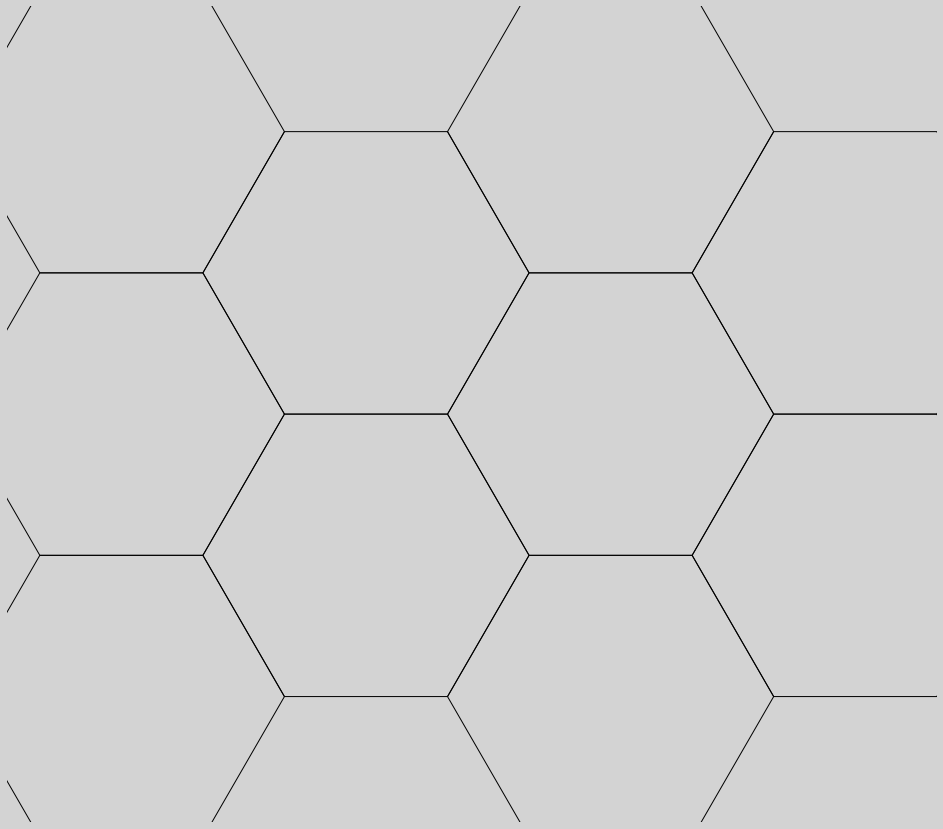

In [117]:
hg, fig, ax, num_rows, num_co = grid_10('lightgray')
for idx, h in enumerate(hg.hlist):
        h.render(fill=None, lw=1, color='k', zorder=3)


In [90]:
??grid_med


6 [('v', 5), ('ea', 4), ('sb', 1), ('eb', 1)] poly


(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

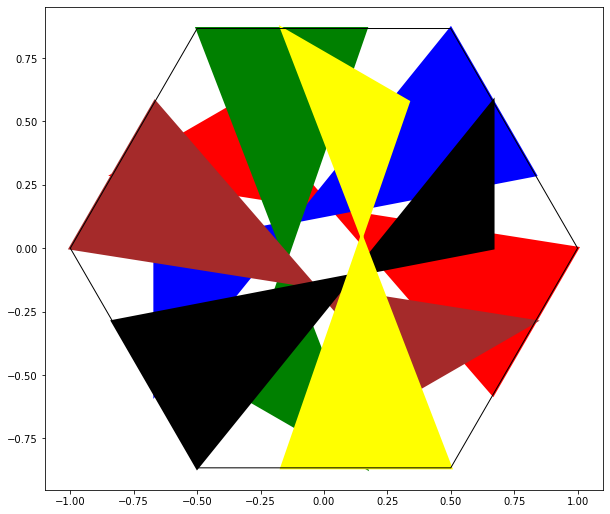

In [120]:
fig, ax = plt.subplots(figsize=(10,10))
pt_tups = [('v', np.random.randint(6)),
           ('ea', np.random.randint(6)),
           ('sb', np.random.randint(6)),
           ('eb', np.random.randint(6))]

#pt_tups = [('v', 0), ('ab', 1), ('ea', 3)]
axi = np.random.choice(['x', '6', 'y', 'z'])
#axi = '6'
close = np.random.choice(['True', 'False'])

shape = np.random.choice(['line', 'poly', ['poly', 'line']])
shape = 'poly'
print(axi, pt_tups, shape)
color_scheme = {axi: [CYANS[x] for x in range(6)]}
color_scheme = {axi: ['red', 'blue', 'green', 'brown', 'black', 'yellow']}

h0.draw_symmetrical_shapes(pt_tups, axi, shape=shape,
                          color_scheme=color_scheme,
                          draw_axis=True, lw=3, close=close)

#_draw_symmetrical_lines(h0, pt_tups, axi, shape=['poly', 'line'], color_scheme=color_scheme,
#                       draw_axis=True, lw=3, close=close, alpha=0.5)
h0.render(fill=None)
plt.axis('scaled')


In [81]:
    ('v',0), ('ab',0), ('sb',1), ('v',1)
    color_d = {k: get_random_color() for k in range(2)}
    
    #    color_scheme = {axi: [CYANS[x] for x in range(6)]}
    #Needs up to 6 Colors...
    color_scheme = {axi: ['red', 'blue', 'green', 'brown', 'black', 'orange']}

    [('v', np.random.randint(6)),
               ('ea', np.random.randint(6)),
               ('sb', np.random.randint(6)),
               ('eb', np.random.randint(6))]

[('v', 0), ('ea', 2), ('sb', 1), ('eb', 0)]

Col_iter 0 6


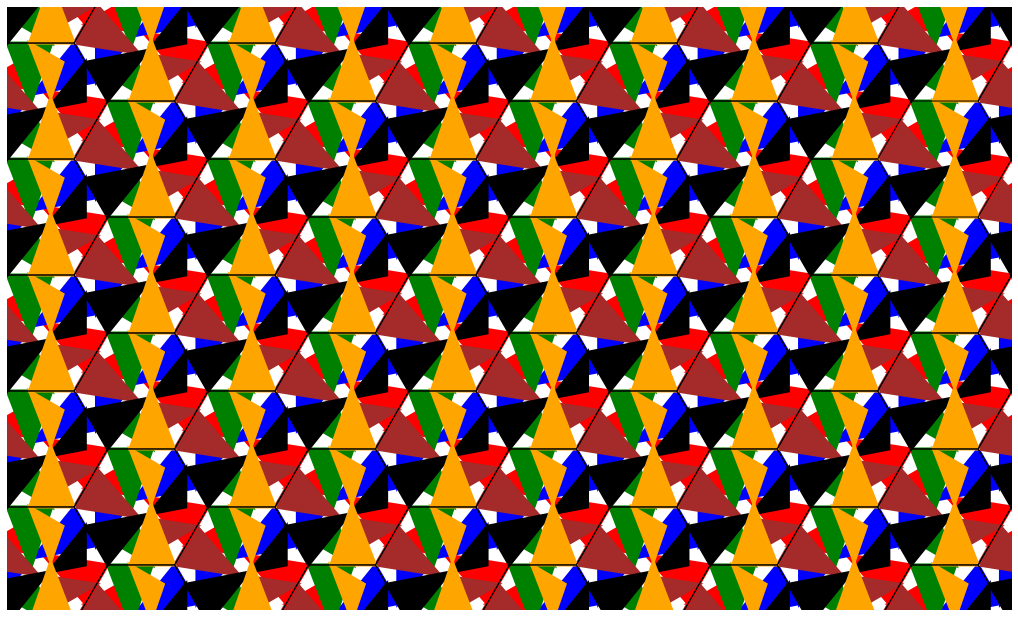

In [122]:
def cookie_sheets(nbk, design_keyword):
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    
    
    
    directions_d = {}
    
    close = np.random.choice(['True', 'False'])
    shape = np.random.choice(['line', 'poly', ['poly', 'line']])
    
    directions_d['pt_tuples'] = [('v', 5), ('ea', 4), ('sb', 1), ('eb', 1)]
    #[('v', 1), ('ea', 3), ('sb', 5), ('eb', 3)] #[('v', 5), ('ea', 4), ('sb', 2), ('eb', 3)]
    
    directions_d['axis']  = np.random.choice(['x', 'y', 'z', '6'])
    directions_d['axis']  = '6'
    directions_d['shape']  = 'poly'
    #directions_d['shape']  = 'line'
    
    primary =  ['red', 'blue', 'green', 'brown', 'black', 'orange']

    #Color Variations
    for col_iter in range(1):
        hg, fig, ax, num_rows, num_cols = grid_5()
        print(f'Col_iter {col_iter} {directions_d["axis"]}')
        #Needs up to 6 Colors...
        fam = get_random_colorfamily()
        colors_6 = [get_random_color() for k in range(6)]

        color_scheme = {directions_d['axis']: primary}
        #color_scheme = {directions_d['axis']: colors_6}
        
        #print(color_scheme, directions_d)
        for idx, h in enumerate(hg.hlist):
            hex_cookie_cutter(h, color_scheme, directions_d, ax)
            if np.random.random() < 0.99:
                h.render(fill=None, lw=1, color='k', zorder=3)

        pf.save_file(fig, 
                     design_keyword, 
                     nbk = nbk,
                     num_rows=num_rows, 
                     num_cols=num_cols
                )

        #plt.close()
    logging.info('Finished')
    
def main():
    
    #SHEET Variables: COLOR, LINE vs Shape, Axis. Which Points?
    nbk = 20    
    design_keyword = "Symm_"

    cookie_sheets(nbk, design_keyword)

if __name__ == '__main__':
    main()


In [ ]:
import os
os.getcwd()

In [ ]:
!dir images\\temp

In [ ]:
os.listdir('images/temp')